<a href="https://colab.research.google.com/github/adityaorlalu/NeuralNetworks/blob/master/1_%2BCifar_10_with_dropout_without_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade tensorflow
# !pip install --upgrade keras

In [2]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 50

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


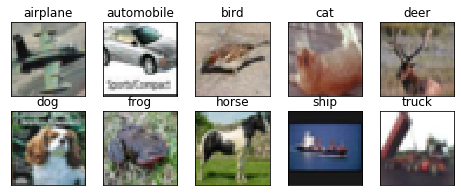

In [5]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 251us/step - loss: 2.1046 - accuracy: 0.2150 - val_loss: 1.8089 - val_accuracy: 0.3622
Epoch 2/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.7647 - accuracy: 0.3578 - val_loss: 1.6306 - val_accuracy: 0.4053
Epoch 3/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.5840 - accuracy: 0.4192 - val_loss: 1.4551 - val_accuracy: 0.4724
Epoch 4/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.4528 - accuracy: 0.4718 - val_loss: 1.3023 - val_accuracy: 0.5278
Epoch 5/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.3670 - accuracy: 0.5080 - val_loss: 1.2492 - val_accuracy: 0.5513
Epoch 6/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.2958 - accuracy: 0.5345 - val_loss: 1.2446 - val_accuracy: 0.5580
Epoch 7/10
50000/50000 [==============================] 

Result: After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.